# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [11]:
#  Converting categorical variables into numerical format (one-hot encoding)
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

In [12]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['total_wants'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

In [14]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,total_wants
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,2
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,2


In [15]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       ...
       'booking_origin_Tonga', 'booking_origin_Tunisia',
       'booking_origin_Turkey', 'booking_origin_Ukraine',
       'booking_origin_United Arab Emirates', 'booking_origin_United Kingdom',
       'booking_origin_United States', 'booking_origin_Vanuatu',
       'booking_origin_Vietnam', 'total_wants'],
      dtype='object', length=919)

## Training a ML model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Spliting the data into features (X) and target variable (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Training the RandomForest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Making predictions on the test set
y_pred = model.predict(X_test)

## Evaluation of the model

In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.848125 0.85025  0.848    0.84425  0.854375]
Mean CV score: 0.849


In [22]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8526
Precision: 0.5076530612244898
Recall: 0.13445945945945945
F1-score: 0.2126068376068376


## Addressing Class Imbalances

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data to address class imbalance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.829
Precision: 0.39332096474953615
Recall: 0.2864864864864865
F1-score: 0.33150899139953094


## Fine tuning hyperparameters

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
# Performing Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [36]:
# Get the best hyperparameters and model
best_params = random_search.best_params_
best_rf_clf = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_clf.predict(X_test)

In [37]:
# Calculate evaluation metrics with the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy with Best Model:", accuracy)
print("Precision with Best Model:", precision)
print("Recall with Best Model:", recall)
print("F1-score with Best Model:", f1)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy with Best Model: 0.829
Precision with Best Model: 0.39332096474953615
Recall with Best Model: 0.2864864864864865
F1-score with Best Model: 0.33150899139953094


In [38]:
# Getting feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
print(feature_importances)

                           feature  importance
0                   num_passengers    0.046293
1                    purchase_lead    0.151485
2                   length_of_stay    0.112606
3                      flight_hour    0.123613
4                       flight_day    0.087934
..                             ...         ...
913  booking_origin_United Kingdom    0.000748
914   booking_origin_United States    0.002042
915         booking_origin_Vanuatu    0.000051
916         booking_origin_Vietnam    0.002161
917                    total_wants    0.025879

[918 rows x 2 columns]


In [39]:
most_influential_features = feature_importances.sort_values(by='importance', ascending=False)

N = 20
top_features = most_influential_features.head(N)
print(top_features)

                        feature  importance
1                 purchase_lead    0.151485
3                   flight_hour    0.123613
2                length_of_stay    0.112606
4                    flight_day    0.087934
0                num_passengers    0.046293
8               flight_duration    0.034880
864     booking_origin_Malaysia    0.030613
917                 total_wants    0.025879
817    booking_origin_Australia    0.019891
7         wants_in_flight_meals    0.014787
6          wants_preferred_seat    0.012152
5           wants_extra_baggage    0.011040
731                route_PENTPE    0.007720
10         sales_channel_Mobile    0.005405
850    booking_origin_Indonesia    0.005349
9        sales_channel_Internet    0.005277
20                 route_AKLKUL    0.004601
443                route_ICNPEN    0.004567
898  booking_origin_South Korea    0.004158
893    booking_origin_Singapore    0.003912


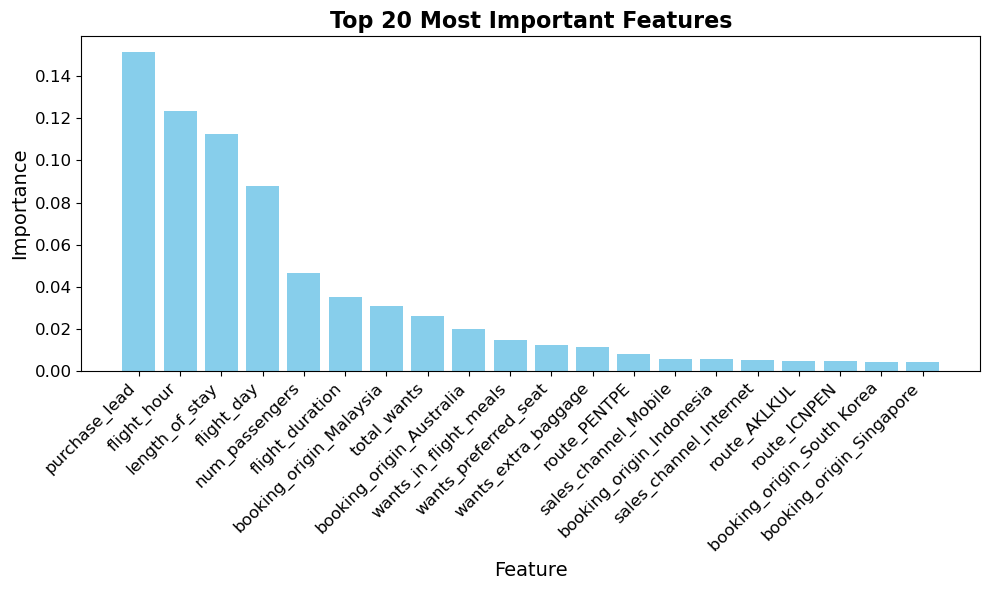

In [40]:
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
top_n = 20  
top_features = feature_importances.head(top_n)

# Create the bar plot for the top features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Top {} Most Important Features'.format(top_n), fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [41]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,total_wants
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,2
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,2


In [42]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       ...
       'booking_origin_Tonga', 'booking_origin_Tunisia',
       'booking_origin_Turkey', 'booking_origin_Ukraine',
       'booking_origin_United Arab Emirates', 'booking_origin_United Kingdom',
       'booking_origin_United States', 'booking_origin_Vanuatu',
       'booking_origin_Vietnam', 'total_wants'],
      dtype='object', length=919)